In [1]:
library(ggplot2)
library(mgcv)
library(visreg)
library(reshape2)
library(ggpubr)
library(ggpattern)
library(plyr)
library(ggsignif)
library(lmerTest)
library(dplyr)
library(broom.mixed)
library(sjPlot)
library(sjmisc)
library(sjlabelled)
library(lme4)

Loading required package: nlme

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required namespace: memoise


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'pa

In [2]:
datax = read.csv('gmdata2.csv')
datax = datax[!duplicated(datax),]
#head(datax)
#dd= subset(pnc, CBFTYPE=='BASIL')
#head(dd)


Model summary:


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: QEI ~ FD * CBFTYPE + AGE + FD + (1 | sub)
   Data: pnc

REML criterion at convergence: -26980

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.9904 -0.3817  0.0214  0.4559  4.7989 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub      (Intercept) 0.004577 0.06766 
 Residual             0.005559 0.07456 
Number of obs: 13606, groups:  sub, 3428

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      8.598e-01  3.313e-03  6.192e+03 259.557  < 2e-16 ***
FD              -8.415e-02  1.158e-02  8.393e+03  -7.268 3.98e-13 ***
CBFTYPEPVC      -9.268e-03  2.852e-03  1.012e+04  -3.249  0.00116 ** 
CBFTYPESCBF     -1.361e-01  2.852e-03  1.012e+04 -47.733  < 2e-16 ***
CBFTYPESCRUB    -4.146e-02  2.929e-03  1.020e+04 -14.156  < 2e-16 ***
AGE             -2.177e-03  6.604e-05  3.393e+03 -32.957  < 2e-16 ***
FD:CBFTYPEPVC    1.169e-0



Get the overall interaction signficance using anova: 


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
FD,3.633630,3.633630,1,3382.661,653.6270,5.846113e-132
CBFTYPE,15.863792,5.287931,3,10157.852,951.2070,0.000000e+00
AGE,6.038241,6.038241,1,3393.120,1086.1748,6.622798e-207
FD:CBFTYPE,8.824644,2.941548,3,10144.485,529.1334,1.662432e-319


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



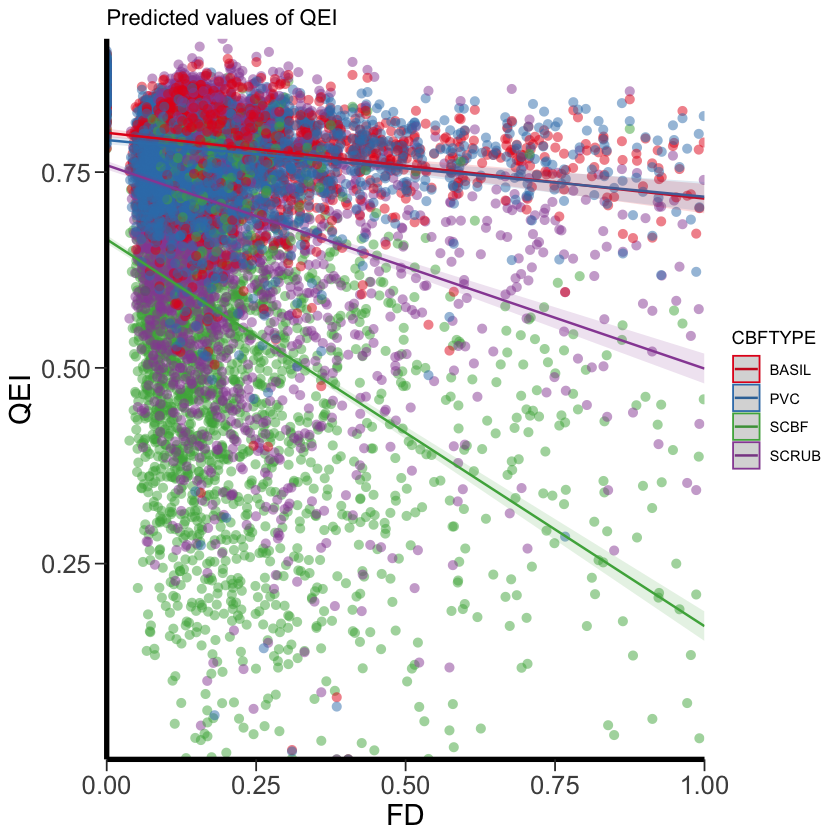

In [4]:

#pnc <- subset(datax, Datasets=='FTD')
pnc = datax
#pnc = na.omit(pnc)
#pnc.cen <- pnc$QEI - mean(pnc$QEI)

pnc.model <- lmerTest::lmer(QEI ~FD*CBFTYPE +AGE +FD + (1 | sub ), data=pnc)

cat("\nModel summary:\n")
summary(pnc.model)

cat("\n\nGet the overall interaction signficance using anova: \n")
anova(pnc.model)

sjPlot::plot_model(pnc.model, colors = "Set1",type = "int",show.data = TRUE) + theme(axis.title.x = element_text(size = rel(1.6))) +
            theme(axis.title.y = element_text(size = rel(1.6))) + 
            theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = 1.5), axis.ticks.length = unit(.25, "cm")) +
           theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank())  + scale_x_continuous(expand = c(0, 0)) +
           scale_y_continuous(expand = c(0, 0))


#Plot

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
FD,3.633630,3.633630,1,3382.661,653.6270,5.846113e-132
CBFTYPE,15.863792,5.287931,3,10157.852,951.2070,0.000000e+00
AGE,6.038241,6.038241,1,3393.120,1086.1748,6.622798e-207
FD:CBFTYPE,8.824644,2.941548,3,10144.485,529.1334,1.662432e-319


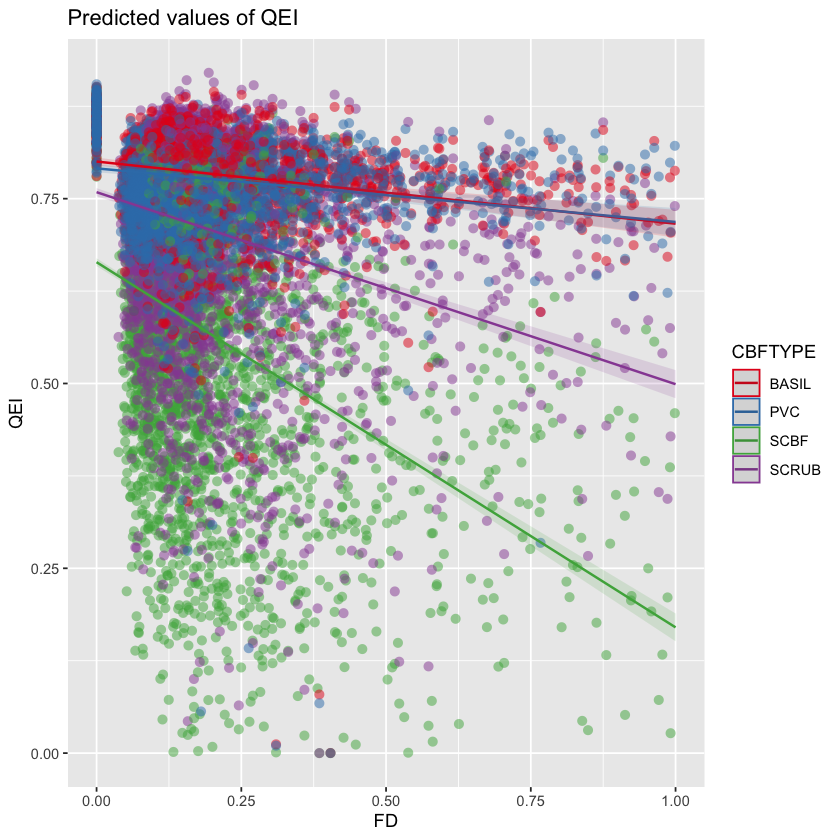

In [5]:
anova(pnc.model)

#Plot
sjPlot::plot_model(pnc.model,type = "int",show.data = TRUE)

In [5]:
summary(pnc.model)$coefficients

,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),0.859806756,3.312597e-03,6191.509,259.5567034,0.000000e+00
FD,-0.084150242,1.157838e-02,8393.479,-7.2678793,3.979178e-13
CBFTYPEPVC,-0.009267768,2.852252e-03,10122.573,-3.2492813,1.160746e-03
CBFTYPESCBF,-0.136147442,2.852252e-03,10122.573,-47.7333226,0.000000e+00
CBFTYPESCRUB,-0.041459686,2.928745e-03,10195.289,-14.1561261,4.568720e-45
AGE,-0.002176572,6.604244e-05,3393.120,-32.9571659,6.622798e-207
FD:CBFTYPEPVC,0.011687228,1.212019e-02,10122.573,0.9642778,3.349297e-01
FD:CBFTYPESCBF,-0.409870363,1.212019e-02,10122.573,-33.8171637,1.315592e-237
FD:CBFTYPESCRUB,-0.175587923,1.231671e-02,10167.223,-14.2560723,1.130733e-45


In [6]:
#write.table('file.txt',spnc.model$coefficients)

In [7]:
dd = tidy(pnc.model)
dd$p.bonf  = p.adjust(dd$p.value)
#dd

tablex = cbind(dd$term,dd$estimate,dd$std.error,dd$statistic,dd$df,dd$p.value,dd$p.bonf)
tablex

(Intercept),0.85980675569258,0.00331259699511233,259.556703384446,6191.50893973294,0,0
FD,-0.0841502422378085,0.0115783764129912,-7.26787929811901,8393.47921586813,3.97917808386773e-13,1.19375342516032e-12
CBFTYPEPVC,-0.00926776756057468,0.00285225152211675,-3.24928130941859,10122.573151272,0.00116074630350427,0.00232149260700855
CBFTYPESCBF,-0.136147442007964,0.00285225152211675,-47.7333225882284,10122.5731508662,0,0
CBFTYPESCRUB,-0.0414596855582536,0.00292874515031602,-14.156126064359,10195.2887970412,4.56872039629286e-45,1.82748815851714e-44
AGE,-0.0021765717031571,6.60424416453061e-05,-32.9571658608082,3393.12003545756,6.62279784382328e-207,3.97367870629397e-206
FD:CBFTYPEPVC,0.0116872276572186,0.0121201874719835,0.964277795556738,10122.5731512479,0.334929705210829,0.334929705210829
FD:CBFTYPESCBF,-0.409870363462302,0.0121201874719835,-33.8171636709201,10122.5731510605,1.31559188054204e-237,9.20914316379425e-237
FD:CBFTYPESCRUB,-0.175587923190823,0.0123167110506854,-14.2560722962687,10167.2231775317,1.13073343079198e-45,5.65366715395992e-45
sd__(Intercept),0.0676571665734091,NA,NA,NA,NA,NA
sd__Observation,0.0745599076637339,NA,NA,NA,NA,NA


In [8]:

dd = tidy(pnc.model)
dd$p.bonf  = p.adjust(dd$p.value)
#dd

tablex = cbind(dd$term,dd$estimate,dd$std.error,dd$statistic,dd$df,dd$p.value,dd$p.bonf)
#tablex
colnames(tablex)=c('Term','Estimate','Std.Error','tStatistic','df','pvalue','pvaluebonf')
tablex = tablex [complete.cases(tablex ), ]
tablex =data.frame(tablex)
tablex$Estimate=round(as.numeric(tablex$Estimate),4)
tablex$Std.Error=round(as.numeric(tablex$Std.Error),4)
tablex$tStatistic=round(as.numeric(tablex$tStatistic),4)
tablex$df=round(as.numeric(tablex$df),0)
tablex$pvalue = signif(as.numeric(tablex$pvalue),4)
tablex$pvaluebonf = signif(as.numeric(tablex$pvaluebonf),4)
tablex

Term,Estimate,Std.Error,tStatistic,df,pvalue,pvaluebonf
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.8598,0.0033,259.5567,6192,0.000e+00,0.000e+00
FD,-0.0842,0.0116,-7.2679,8393,3.979e-13,1.194e-12
CBFTYPEPVC,-0.0093,0.0029,-3.2493,10123,1.161e-03,2.321e-03
CBFTYPESCBF,-0.1361,0.0029,-47.7333,10123,0.000e+00,0.000e+00
CBFTYPESCRUB,-0.0415,0.0029,-14.1561,10195,4.569e-45,1.827e-44
AGE,-0.0022,0.0001,-32.9572,3393,6.623e-207,3.974e-206
FD:CBFTYPEPVC,0.0117,0.0121,0.9643,10123,3.349e-01,3.349e-01
FD:CBFTYPESCBF,-0.4099,0.0121,-33.8172,10123,1.316e-237,9.209e-237
FD:CBFTYPESCRUB,-0.1756,0.0123,-14.2561,10167,1.131e-45,5.654e-45


In [9]:
write.table(tablex,file = "pncmodeltest.txt",quote=F, row.names=F,sep = "   ")

In [10]:
summary(pnc.model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: QEI ~ FD * CBFTYPE + AGE + FD + (1 | sub)
   Data: pnc

REML criterion at convergence: -26980

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.9904 -0.3817  0.0214  0.4559  4.7989 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub      (Intercept) 0.004577 0.06766 
 Residual             0.005559 0.07456 
Number of obs: 13606, groups:  sub, 3428

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      8.598e-01  3.313e-03  6.192e+03 259.557  < 2e-16 ***
FD              -8.415e-02  1.158e-02  8.393e+03  -7.268 3.98e-13 ***
CBFTYPEPVC      -9.268e-03  2.852e-03  1.012e+04  -3.249  0.00116 ** 
CBFTYPESCBF     -1.361e-01  2.852e-03  1.012e+04 -47.733  < 2e-16 ***
CBFTYPESCRUB    -4.146e-02  2.929e-03  1.020e+04 -14.156  < 2e-16 ***
AGE             -2.177e-03  6.604e-05  3.393e+03 -32.957  < 2e-16 ***
FD:CBFTYPEPVC    1.169e-0

In [11]:
datax = read.csv('gmdata2.csv')
datax <- subset(datax, datax$QEI> 0.1)
namex='all'
datay = datax[datax$Datasets != 'FTD',]
scbf = datay[datay$CBFTYPE=='SCBF',]
scrub = datay[datay$CBFTYPE=='SCRUB',]
basil = datay[datay$CBFTYPE=='BASIL',]
pvc = datay[datay$CBFTYPE=='PVC',]

cols = c("LINE1"="#e34a33","LINE2"="#3182bd","LINE3"="#d95f02",'LINE4'="#c51b8a")

CBF_Age_plot <- ggplot() + xlim(0, 1.1)+ ylim(0,1.1) +
  #theme(legend.position = "none")  +
  
  theme(axis.title.x = element_text(size = rel(1.2))) +
  theme(axis.title.y = element_text(size = rel(1.2),vjust=-0.9)) + 
  theme(axis.text = element_text(size = rel(1.2))) + theme(axis.line = element_line(colour = 'black', size = 0.5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  #geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  geom_point(data=scbf,aes(x=FD, y=QEI),size=1,color="red",alpha = 2/10)+ 
  geom_point(data=scrub,aes(x=FD, y=QEI),size=1,color="blue",alpha = 2/10)+ 
  geom_point(data=basil,aes(x=FD, y=QEI),size=1,color='darkgreen',alpha = 2/10)+ 
  #geom_point(data=pvc,aes(x=FD, y=QEI),size=1,color="#c51b8a")+ 

  geom_smooth(method='lm',data=scbf, aes(x=FD, y=QEI), color="red")+
  geom_smooth(method='lm',data=scrub,aes(x=FD, y=QEI), color="blue")+
  geom_smooth(method='lm',data=basil,aes(x=FD, y=QEI), color='darkgreen')+
  #geom_smooth(method='lm',data=pvc,aes(x=FD, y=QEI), color="#c51b8a") +
  labs(x = "FD (mm)", y = "QEI",color=cols)+ 
  scale_colour_manual(values=cols) + 
  scale_linetype_manual(values=cols) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0, 0))

  #theme(legend.position="bottom")

#dev.off()

## Export image
#png(filename="Sup_Figure7X.pdf",res = 600, width = 4, height = 4, units = 'in')
ggsave("Sup_Figure7X.pdf", width=5, units="in", height=4,dpi=800)
#CBF_Age_plot
#dev.off()

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

